In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('classification.csv')
df.sample(5)

,Obs,Outlook,Tempreture,Humiodity,Wind,Play Tennis
2,3,Overcast,Hot,High,Weak,Yes
8,9,Sunny,Cool,Normal,Weak,Yes
1,2,Sunny,Hot,High,Strong,No
7,8,Sunny,Mild,High,Weak,No
5,6,Rain,Cool,Normal,Strong,No


In [4]:
df.head()

,Obs,Outlook,Tempreture,Humiodity,Wind,Play Tennis
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes


In [5]:
df.shape

(14, 6)

In [6]:
df.info

<bound method DataFrame.info of     Obs   Outlook Tempreture  Humiodity    Wind Play Tennis
0     1     Sunny         Hot      High    Weak          No
1     2     Sunny         Hot      High  Strong          No
2     3  Overcast         Hot      High    Weak         Yes
3     4      Rain        Mild      High    Weak         Yes
4     5      Rain        Cool    Normal    Weak         Yes
5     6      Rain        Cool    Normal  Strong          No
6     7  Overcast        Cool    Normal  Strong         Yes
7     8     Sunny        Mild      High    Weak          No
8     9     Sunny        Cool    Normal    Weak         Yes
9    10      Rain        Mild    Normal    Weak         Yes
10   11     Sunny        Mild    Normal  Strong         Yes
11   12  Overcast        Mild      High  Strong         Yes
12   13  Overcast         Hot    Normal    Weak         Yes
13   14      Rain        Mild      High  Strong          No>

In [7]:
df.describe()

,Obs
count,14.0000
mean,7.5000
std,4.1833
min,1.0000
25%,4.2500
50%,7.5000
75%,10.7500
max,14.0000


In [65]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Outlook'] = label_encoder.fit_transform(df['Outlook'])
#df['Tempreture '] = label_encoder.fit_transform(df['Tempreture '])
df['Humiodity'] = label_encoder.fit_transform(df['Humiodity'])
df['Wind'] = label_encoder.fit_transform(df['Wind'])
df['Play Tennis'] = label_encoder.fit_transform(df['Play Tennis'])
df

,Obs,Outlook,Tempreture,Humiodity,Wind,Play Tennis
0,1,2,1,0,1,0
1,2,2,1,0,0,0
2,3,0,1,0,1,1
3,4,1,2,0,1,1
4,5,1,0,1,1,1
5,6,1,0,1,0,0
6,7,0,0,1,0,1
7,8,2,2,0,1,0
8,9,2,0,1,1,1
9,10,1,2,1,1,1


In [66]:
cm=df.corr()
cm

,Obs,Outlook,Tempreture,Humiodity,Wind,Play Tennis
Obs,1.000000,-0.255162,0.361620,3.012272e-01,-2.506402e-01,0.240370
Outlook,-0.255162,1.000000,0.092036,-8.944272e-02,7.745967e-02,-0.493333
Tempreture,0.361620,0.092036,1.000000,-5.144958e-01,-2.475369e-02,-0.051131
Humiodity,0.301227,-0.089443,-0.514496,1.000000e+00,-6.409876e-17,0.447214
Wind,-0.250640,0.077460,-0.024754,-6.409876e-17,1.000000e+00,0.258199
Play Tennis,0.240370,-0.493333,-0.051131,4.472136e-01,2.581989e-01,1.000000


<Axes: >

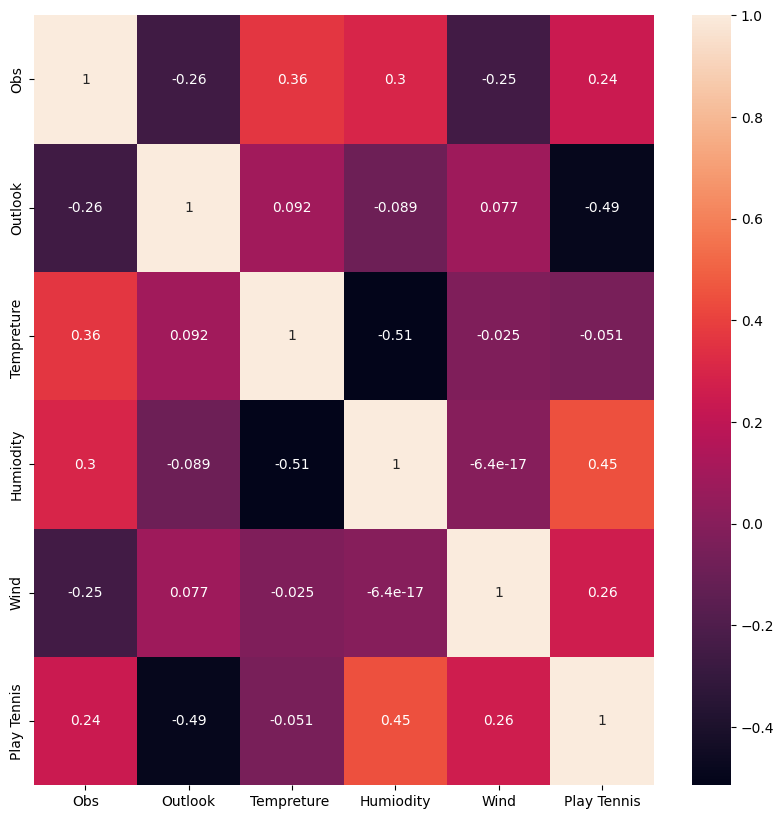

In [67]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

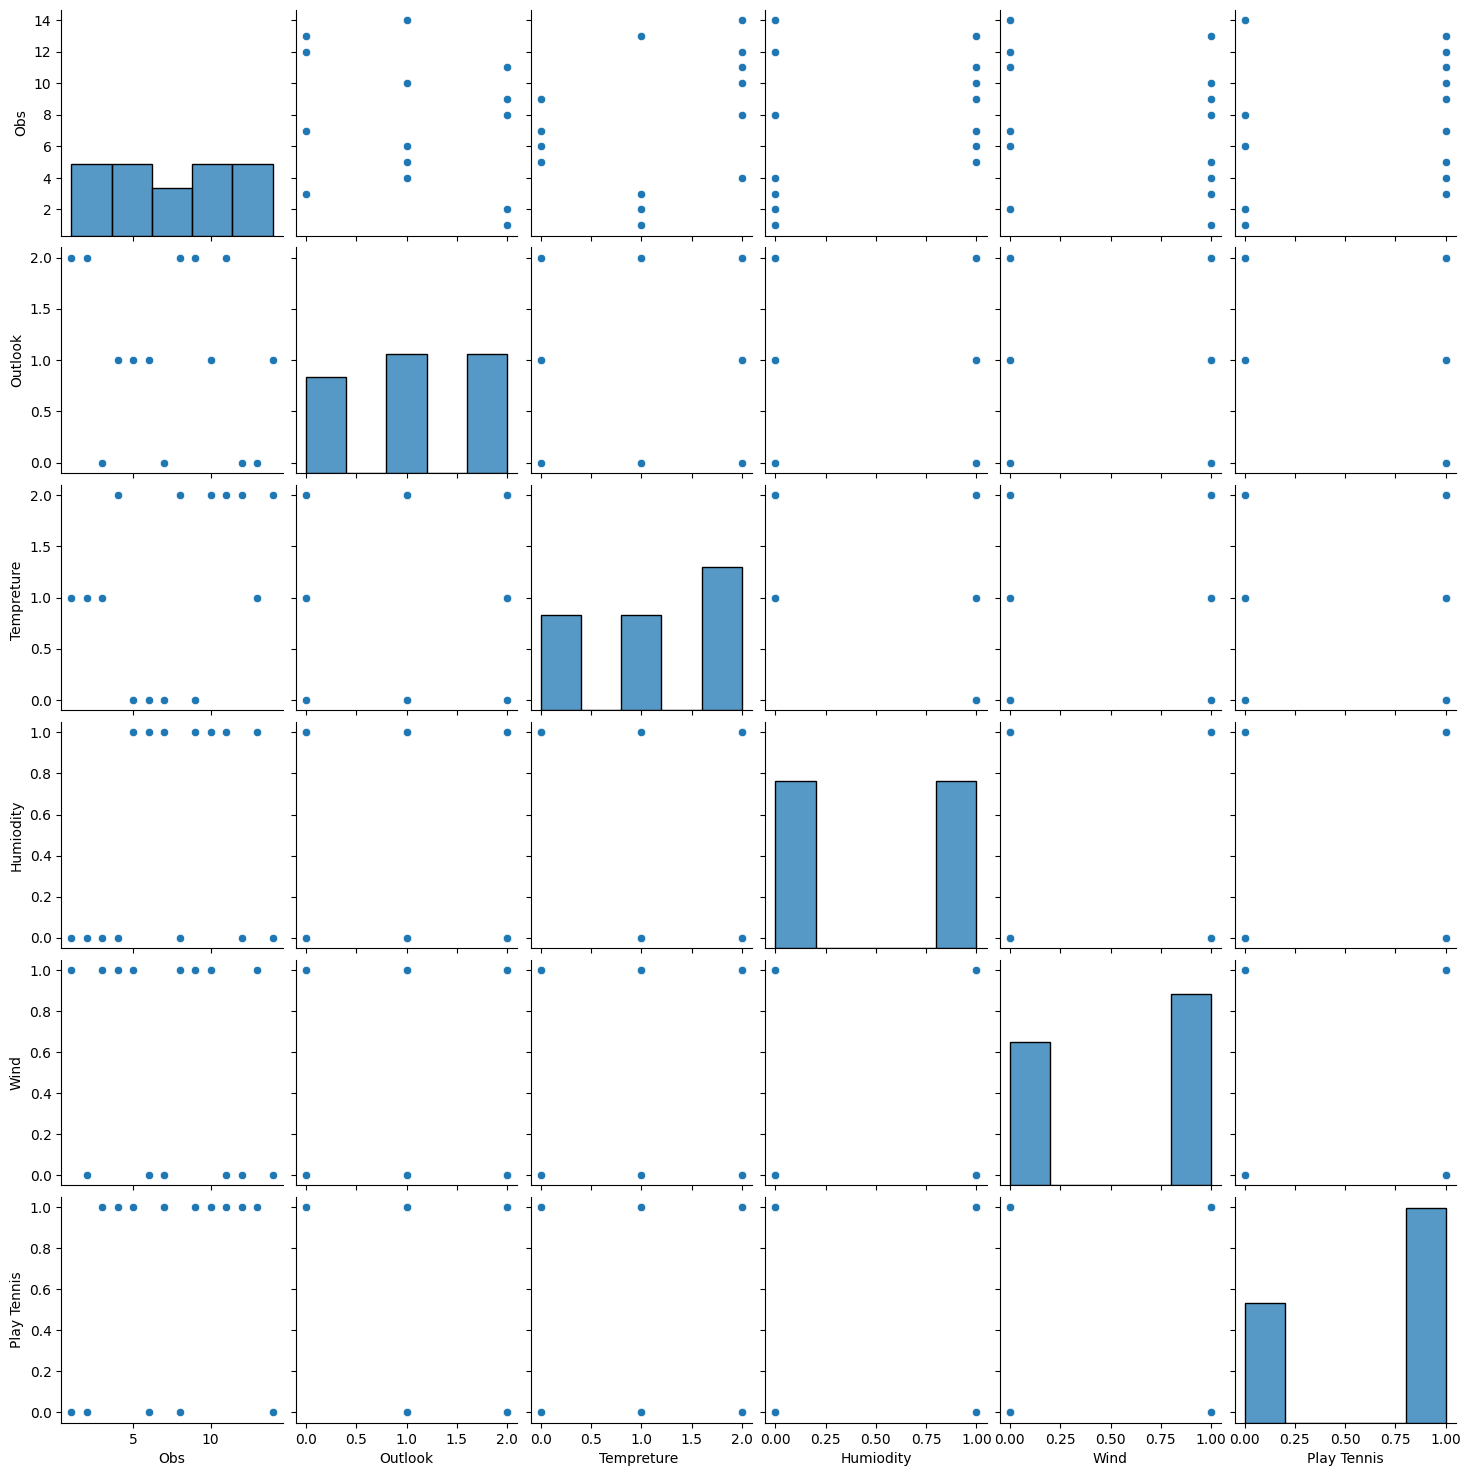

In [68]:
sns.pairplot(df)

array([[<Axes: title={'center': 'Obs'}>,
        <Axes: title={'center': 'Outlook'}>],
       [<Axes: title={'center': 'Tempreture '}>,
        <Axes: title={'center': 'Humiodity'}>],
       [<Axes: title={'center': 'Wind'}>,
        <Axes: title={'center': 'Play Tennis'}>]], dtype=object)

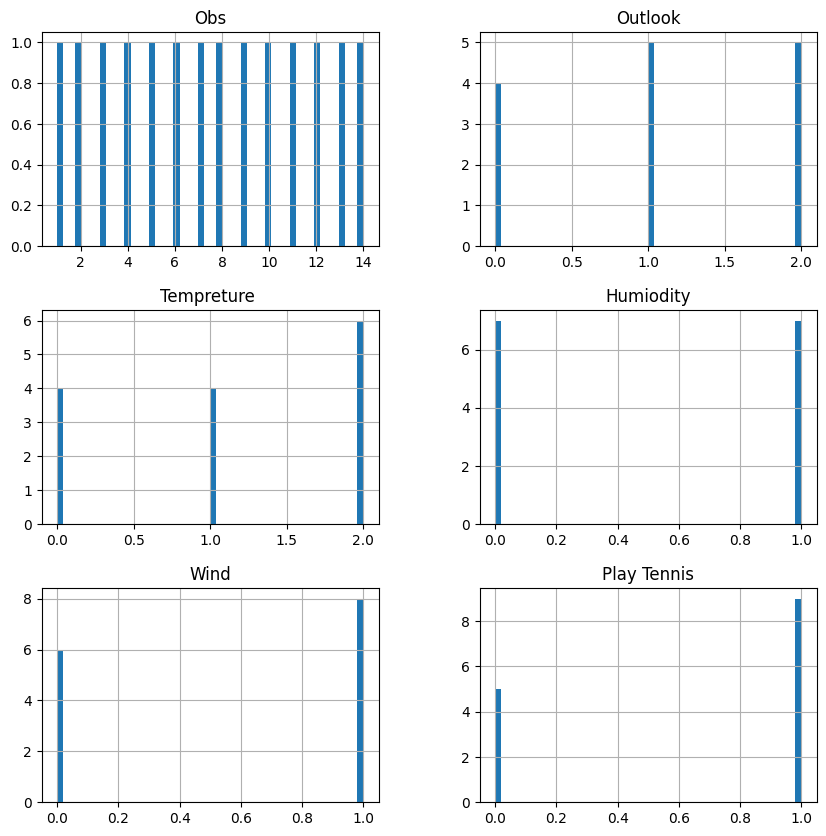

In [69]:
df.hist(figsize=(10,10),bins=50)

In [105]:
x = df[['Outlook','Humiodity','Wind']]
y = df['Play Tennis']

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [107]:
# logistic model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [108]:
y_pred = lr.predict(x_test)
y_pred

array([1, 1, 1, 0, 1], dtype=int64)

In [109]:
y_test

8     1
6     1
4     1
11    1
2     1
Name: Play Tennis, dtype: int64

In [110]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,precision_score,roc_auc_score,recall_score
accuracy_score(y_test,y_pred)

0.8

In [111]:
f1_score(y_test,y_pred)

0.888888888888889

In [112]:
precision_score(y_test,y_pred)

1.0

In [113]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[0, 0],
       [1, 4]], dtype=int64)

In [114]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier(criterion='entropy',random_state=0)
tr.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [115]:
y_pred1 = tr.predict(x_test)
y_pred1

array([1, 0, 1, 0, 1], dtype=int64)

In [116]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,precision_score,roc_auc_score,recall_score
accuracy_score(y_test,y_pred1)

0.6

In [117]:
f1_score(y_test,y_pred1)

0.7499999999999999

In [118]:
precision_score(y_test,y_pred1)

1.0

In [119]:
cm1=confusion_matrix(y_test,y_pred)
cm1

array([[0, 0],
       [1, 4]], dtype=int64)

In [120]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [121]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,precision_score,roc_auc_score,recall_score
y_pred2 = rf.predict(x_test)
y_pred2

array([1, 0, 1, 0, 1], dtype=int64)

In [122]:
accuracy_score(y_test,y_pred2)

0.6

In [123]:
cm=confusion_matrix(y_test,y_pred2)
cm

array([[0, 0],
       [2, 3]], dtype=int64)

In [124]:
# Xgboost
import xgboost as xgb
xg = xgb.XGBClassifier(random_state=1)
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [125]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,precision_score,roc_auc_score,recall_score

y_pred3 = xg.predict(x_test)
y_pred3

array([0, 0, 0, 0, 0])

In [126]:
accuracy_score(y_test,y_pred3)

0.0

In [127]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       5.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0



C:\Users\sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

In [128]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [129]:
y_pred4 = kn.predict(x_test)
y_pred4

array([1, 1, 1, 0, 1], dtype=int64)

In [130]:
accuracy_score(y_test,y_pred4)

0.8

In [131]:
cm = confusion_matrix(y_test,y_pred4)
cm

array([[0, 0],
       [1, 4]], dtype=int64)

In [132]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.80      0.89         5

    accuracy                           0.80         5
   macro avg       0.50      0.40      0.44         5
weighted avg       1.00      0.80      0.89         5



C:\Users\sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [133]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [134]:
y_pred5 = gb.predict(x_test)
y_pred5

array([1, 1, 1, 1, 1], dtype=int64)

In [135]:
accuracy_score(y_test,y_pred5)

1.0

In [136]:
cm =confusion_matrix(y_test,y_pred5)
cm

array([[5]], dtype=int64)

In [137]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [138]:
result = pd.DataFrame({
         'Model':['Logistic Regression','Decision Tree','Random Forest','XGBoost','KNN','GaussianNB'],
          'accuracy':[0.8,0.6,0.6,0.0,0.8,1.0]
})

In [139]:
result = result.sort_values(by='accuracy',ascending=False)
result

,Model,accuracy
5,GaussianNB,1.0
0,Logistic Regression,0.8
4,KNN,0.8
1,Decision Tree,0.6
2,Random Forest,0.6
3,XGBoost,0.0
